# John Wilson
## Pandas I

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

In [2]:
df = pd.Series(-3,xrange(1,6))

In [3]:
df

1   -3
2   -3
3   -3
4   -3
5   -3
dtype: int64

In [4]:
d = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
df = pd.Series(d)

In [5]:
df

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64

## Problem 2

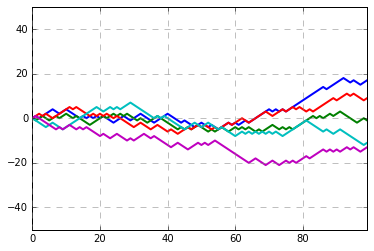

In [6]:
for i in xrange(5):
    N = 100
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    s.plot(linewidth=2)

plt.ylim([-50,50])
plt.grid(linestyle='--', color='grey')
plt.show()
plt.close()

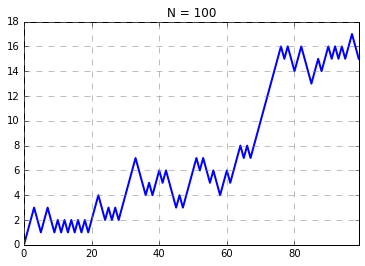

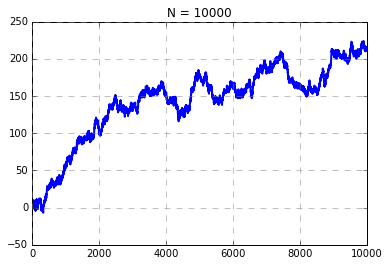

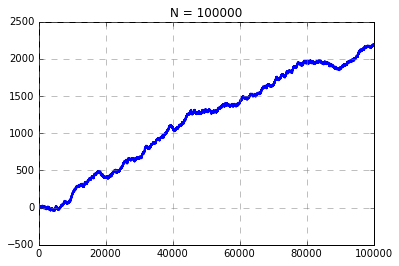

In [7]:
for N in [100,10000,100000]:
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1
    s = pd.Series(s)
    s = s.cumsum()
    s.plot(linewidth=2)
    plt.grid(linestyle='--', color='grey')
    plt.title("N = {}".format(N))
    plt.show()
    plt.close()

## Problem 3

In [8]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', ' Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, ' Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [9]:
x=studentInfo[studentInfo['Sex'] == 'M'][['ID','Name',"Age"]]
x[x['Age']>19]

,ID,Name,Age
0,0,Mylan,20
6,6,Matt,20


## Problem 4

In [10]:
pd.merge(studentInfo,otherInfo,on='ID')[pd.merge(studentInfo,otherInfo,on='ID')['Sex']=='M'][['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


## Problem 5

**Import Crime Data**

In [11]:
df = pd.read_csv('crime_data.txt', skiprows=1, header=0)

**Add "Crime_Rate" Column to the data Frame**

In [12]:
df['Crime_Rate'] = df["Total"]/df["Population"]

**Plot Crime Rate as a function of Year**

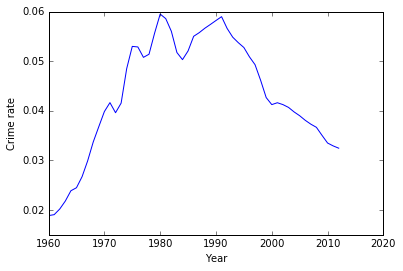

In [13]:
plt.plot(df['Year'], df['Crime_Rate'])
plt.ylabel("Crime rate")
plt.xlabel("Year")
plt.show()
plt.close()

**List 5 years with highest crime rate in descending order**

In [14]:
df.sort_values("Crime_Rate", ascending=False)[:5][["Year","Crime_Rate"]]

,Year,Crime_Rate
20,1980,0.059500
31,1991,0.058978
21,1981,0.058582
30,1990,0.058203
29,1989,0.057410


**Calculate average number of total crimes as well as burglary crimes between 1960 and 2012**

In [15]:
t=df["Total"].mean()
b=df["Burglary"].mean()
print "The mean total crimes is {} and the mean burglaries is {}".format(t,b)

The mean total crimes is 10638068.0755 and the mean burglaries is 2446286.20755


**Find the years for which the total number of crimes was above average and the years for which it was below average**

In [16]:
above = df[df["Total"]>t]["Year"].tolist()
below = df[df["Total"]<t]["Year"].tolist()
print "Crime was above average in:"
print above
print "Crime was below average in:"
print below

Crime was above average in:
[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
Crime was below average in:
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 2010, 2011, 2012]


**Plot number of murders as a function of the population**

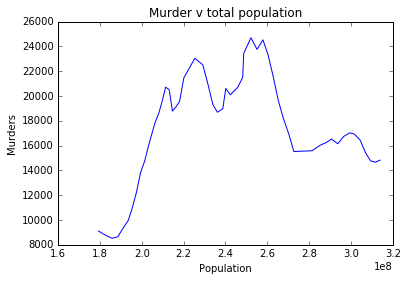

In [17]:
plt.plot(df['Population'], df['Murder'])
plt.xlabel("Population")
plt.ylabel("Murders")
plt.title("Murder v total population")
plt.show()
plt.close()

**Select Population, Violent, and Robbery columns for all years in the 1980's and save this subset to the file "crime_subset.txt"**

In [18]:
x = df[df["Year"]<1991]
x = x[x["Year"]>1979]
df[["Year","Population","Violent","Robbery"]].to_csv('crime_subset.txt')